In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
img_size=256
batch=32
no_of_channels=3

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(img_size,img_size),batch_size=batch)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names

In [7]:
a=dataset.take(1)

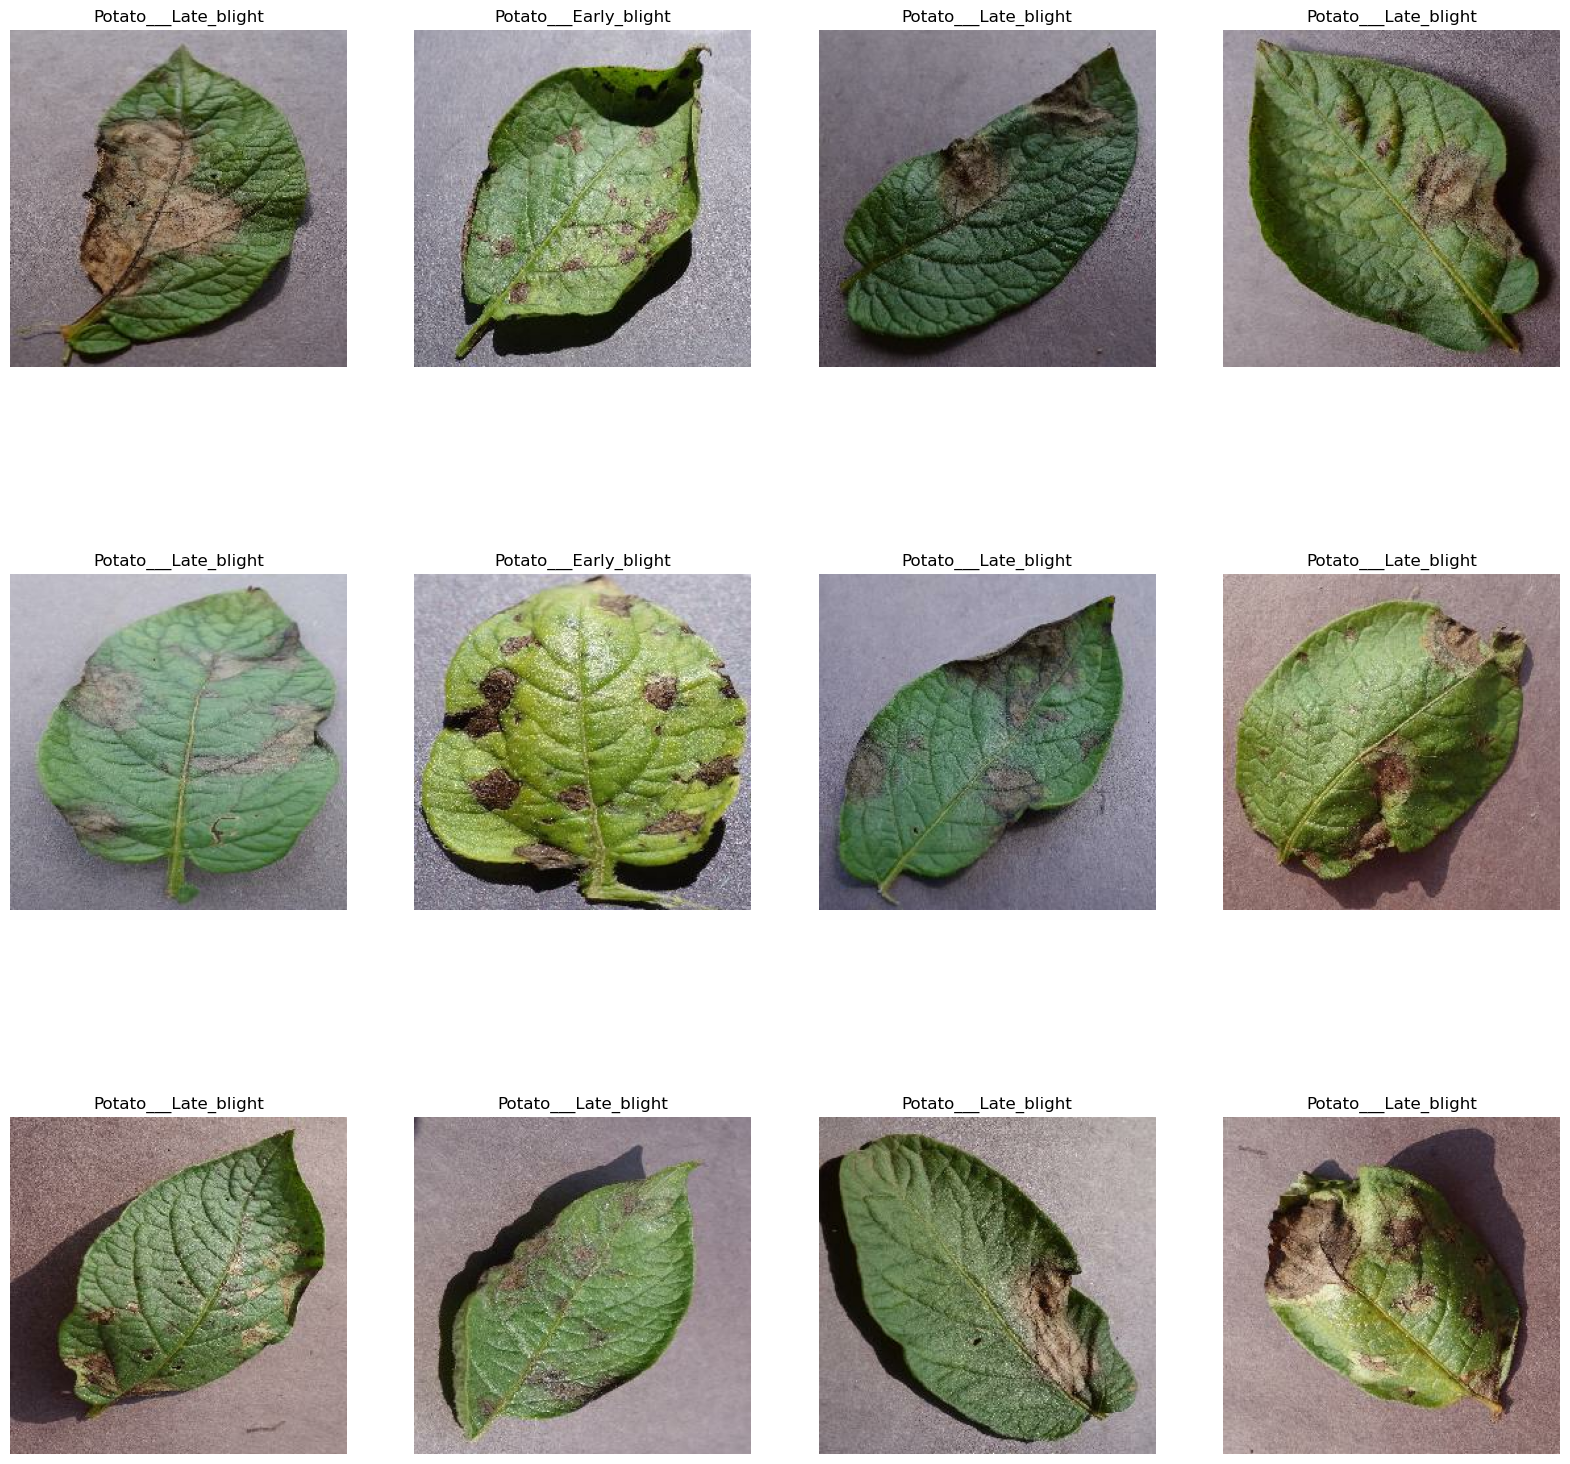

In [8]:
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [9]:
train_dataset=dataset.take(int(0.8*len(dataset)))

In [10]:
len(train_dataset)

54

In [11]:
test=dataset.skip(int(0.8*len(dataset)))

In [12]:
len(test)

14

In [13]:
validation_dataset=test.take(int(0.5*len(test)))
test_dataset=test.skip(int(0.5*len(test)))

In [14]:
print(len(validation_dataset))
print(len(test_dataset))

7
7


In [15]:
def train_test_validation(dataset,train_split=0.8,validation_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    if shuffle==True:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    validation_size=int(ds_size*validation_split)
    train_ds=dataset.take(train_size)
    validation_ds=dataset.skip(train_size).take(validation_size)
    test_ds=dataset.skip(train_size).skip(validation_size)
    return train_ds,validation_ds,test_ds


In [16]:
train_ds,validation_ds,test_ds=train_test_validation(dataset,0.8,0.1,0.1)

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [18]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)]
)

In [18]:
data_augment=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [19]:
input_shape=(batch,img_size,img_size,no_of_channels)
model=models.Sequential([

    resize_rescale,
    data_augment,
    layers.ZeroPadding2D(padding=(2,2),input_shape=input_shape),
    layers.Conv2D(32,kernel_size=(4,4)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(42,kernel_size=(3,3)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(52,kernel_size=(3,3)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(62,kernel_size=(3,3)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(62,kernel_size=(3,3)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(62,kernel_size=(3,3)),
    layers.BatchNormalization(axis=-1),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Flatten(),
    layers.Dense(65,activation="relu"),
    layers.Dense(45,activation='relu'),
    layers.Dense(3,activation="softmax")
                              ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.build(input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 zero_padding2d (ZeroPaddin  (32, 260, 260, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (32, 257, 257, 32)        1568      
                                                                 
 batch_normalization (Batch  (32, 257, 257, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (32, 257, 257, 32)       

In [ ]:
history=model.fit(train_ds,epochs=50,batch_size=batch,verbose=1,validation_data=validation_ds)

Epoch 1/50
54/54 [==============================] - 86s 2s/step - loss: 0.3247 - accuracy: 0.8831 - val_loss: 1.4164 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 82s 2s/step - loss: 0.2029 - accuracy: 0.9259 - val_loss: 2.7501 - val_accuracy: 0.4792
Epoch 3/50
54/54 [==============================] - 83s 2s/step - loss: 0.1465 - accuracy: 0.9468 - val_loss: 4.8786 - val_accuracy: 0.4792
Epoch 4/50
54/54 [==============================] - 83s 2s/step - loss: 0.1130 - accuracy: 0.9583 - val_loss: 4.2995 - val_accuracy: 0.4792
Epoch 5/50
44/54 [=======================>......] - ETA: 15s - loss: 0.0877 - accuracy: 0.9709

In [2]:
model = tf.keras.models.load_model(r"D:\codeprojects\potatoclassifier\models\1")


In [29]:
import numpy as np
scores=model.predict(test_ds)
for image_batch,label_batch in test_ds.take(1):
    print(f"true label for index 1 {class_names[label_batch[9]]}")
    print(f"prediction:{class_names[np.argmax(scores[9])]}")

8/8 [==============================] - 1s 180ms/step
true label for index 1 Potato___Early_blight
prediction:Potato___Early_blight


In [22]:
scores


array([[9.99999881e-01, 1.12832836e-07, 1.97480148e-18],
       [9.94469523e-01, 5.53044723e-03, 2.36191492e-12],
       [6.36423880e-04, 9.99354184e-01, 9.44811927e-06],
       [9.99999642e-01, 4.06882606e-07, 5.08895906e-18],
       [3.73834769e-06, 9.99985099e-01, 1.11813770e-05],
       [6.51038121e-08, 3.87344370e-03, 9.96126473e-01],
       [2.30036880e-04, 9.99769986e-01, 3.01805017e-08],
       [8.03187583e-03, 9.91961420e-01, 6.76013542e-06],
       [9.99999762e-01, 2.65413831e-07, 1.42380200e-18],
       [4.07231454e-07, 9.99969721e-01, 2.99501771e-05],
       [1.04668989e-05, 9.99989510e-01, 1.96446659e-09],
       [9.99997973e-01, 2.01620378e-06, 5.44290997e-17],
       [1.21065154e-04, 9.99874592e-01, 4.33287232e-06],
       [3.26870797e-08, 9.98722970e-01, 1.27697305e-03],
       [9.99998689e-01, 1.26397424e-06, 2.33009768e-14],
       [9.99996662e-01, 3.38028372e-06, 1.19696775e-14],
       [1.49654106e-05, 5.07333782e-03, 9.94911730e-01],
       [9.99922276e-01, 7.77690